[*********************100%***********************]  1 of 1 completed


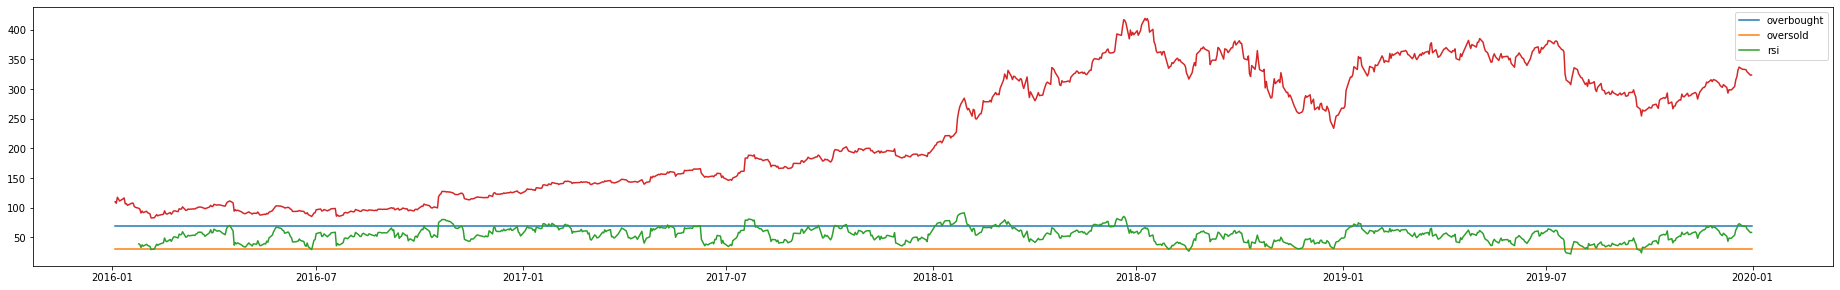

In [68]:
import yfinance
import talib
from matplotlib import pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num
data = yfinance.download('NFLX','2016-1-1','2020-1-1')
rsi = talib.RSI(data["Close"])
fig = plt.figure()
fig.set_size_inches((25, 18))
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
ax_rsi.plot(data.index, rsi, label="rsi")
ax_rsi.plot(data["Close"])
ax_rsi.legend()

In [73]:
import numpy as np
section = None
sections = []
for i in range(len(rsi)): 
    if rsi[i] < 30:
        section = 'oversold'
    elif rsi[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)

patience = np.linspace(1,15,15)
profits = []
for pat in range(1,1000):
    trades = []
    for i in range(1,len(sections)):
        trade = None
        if sections[i-pat] == 'oversold' and sections[i] == None:
            trade = True
        if sections[i-pat] == 'overbought' and sections[i] == None:
            trade = False
        trades.append(trade)

    acp = data['Close'][len(data['Close'])-len(trades):].values
    profit = 0
    logs = []
    qty = 10
    for i in range(len(acp)-1):
        true_trade = None
        if acp[i] < acp[i+1]:
            true_trade = True
        elif acp[i] > acp[i+1]:
            true_trade = False
        if trades[i] != None:
            if trades[i] == true_trade:
                profit += abs(acp[i+1] - acp[i]) * qty
                logs.append(abs(acp[i+1] - acp[i]) * qty)
            elif trades[i] != true_trade:
                profit += -abs(acp[i+1] - acp[i]) * qty
                logs.append(-abs(acp[i+1] - acp[i]) * qty)
    profits.append(profit)